In [1]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [2]:
os.chdir("../")

In [3]:
%pwd

'd:\\iNeuron_Projects\\End_to_End_ML_Dental_Implant_Sandblasting'

### 2. Data Loading and Exploration :

First few rows of the dataset:


,angle_sandblasting,pressure_sandblasting_bar,temperature_acid_etching,time_acid_etching_min,voltage_anodizing_v,time_anodizing_min,sa_surface_roughness_micrometer,cell_viability_percent,Result_Passed_1_Failed_0
0,30,3,25,3,80,1,0.746,75,0
1,40,3,25,3,80,1,0.813,70,0
2,50,3,25,3,80,1,0.952,65,0
3,30,3,25,6,80,1,0.950,77,0
4,30,3,25,9,80,1,1.020,75,0



Data shape: (198, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   angle_sandblasting               198 non-null    int64  
 1   pressure_sandblasting_bar        198 non-null    int64  
 2   temperature_acid_etching         198 non-null    int64  
 3   time_acid_etching_min            198 non-null    int64  
 4   voltage_anodizing_v              198 non-null    int64  
 5   time_anodizing_min               198 non-null    int64  
 6   sa_surface_roughness_micrometer  198 non-null    float64
 7   cell_viability_percent           198 non-null    int64  
 8   Result_Passed_1_Failed_0         198 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 14.0 KB

Data types:
angle_sandblasting                   int64
pressure_sandblasting_bar            int64
temperature_acid_etching      

,angle_sandblasting,pressure_sandblasting_bar,temperature_acid_etching,time_acid_etching_min,voltage_anodizing_v,time_anodizing_min,sa_surface_roughness_micrometer,cell_viability_percent,Result_Passed_1_Failed_0
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,37.121212,4.050505,49.621212,5.818182,99.393939,5.176768,2.086010,77.126263,0.116162
std,8.016193,0.859391,21.738710,2.353801,16.235462,3.694428,0.760536,8.858689,0.321231
min,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,0.746000,62.000000,0.000000
25%,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,1.450000,70.000000,0.000000
50%,30.000000,4.000000,50.000000,6.000000,100.000000,5.000000,2.156000,76.000000,0.000000
75%,40.000000,5.000000,75.000000,9.000000,120.000000,10.000000,2.623500,83.000000,0.000000
max,50.000000,5.000000,75.000000,9.000000,120.000000,10.000000,3.497000,96.000000,1.000000



Missing values by column:
angle_sandblasting                 0
pressure_sandblasting_bar          0
temperature_acid_etching           0
time_acid_etching_min              0
voltage_anodizing_v                0
time_anodizing_min                 0
sa_surface_roughness_micrometer    0
cell_viability_percent             0
Result_Passed_1_Failed_0           0
dtype: int64

Data types after cleaning:
angle_sandblasting                   int64
pressure_sandblasting_bar            int64
temperature_acid_etching             int64
time_acid_etching_min                int64
voltage_anodizing_v                  int64
time_anodizing_min                   int64
sa_surface_roughness_micrometer    float64
cell_viability_percent               int64
Result_Passed_1_Failed_0             int64
dtype: object

Data after Winsorizing 'cell_viability_percent':
count    198.000000
mean      28.651515
std       38.045455
min        0.000000
25%        0.000000
50%        0.000000
75%       71.500000
max     

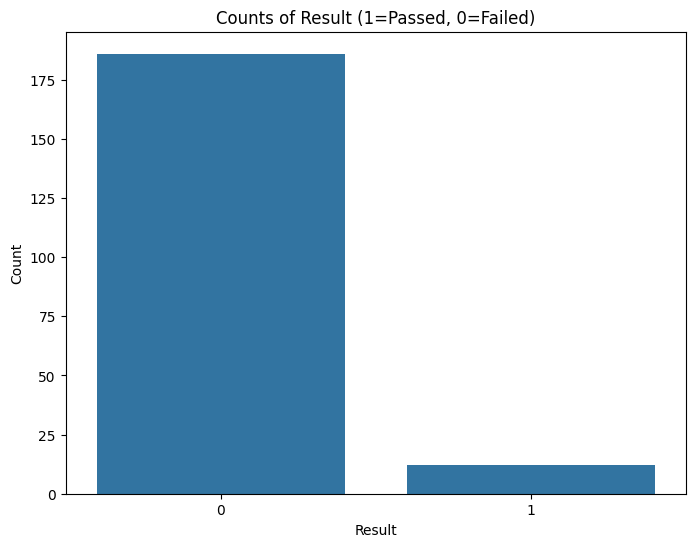

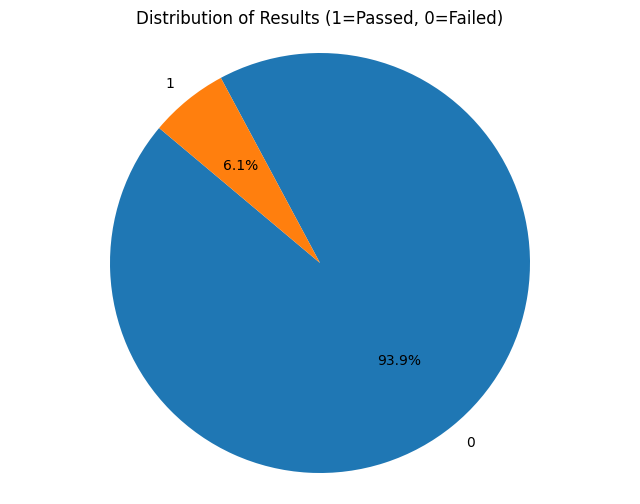

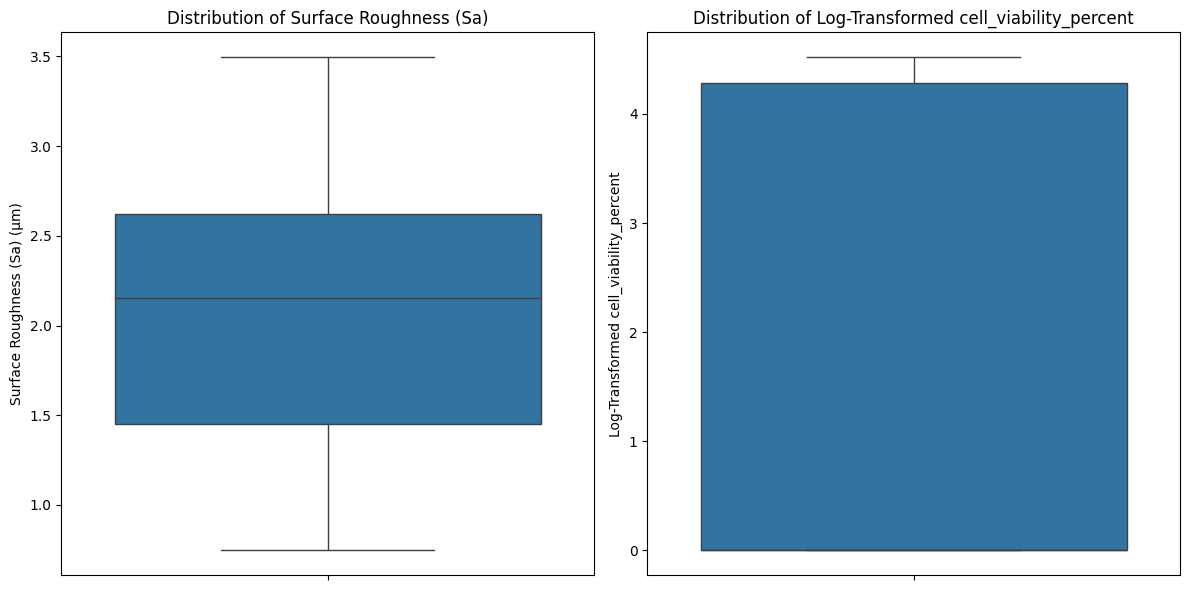

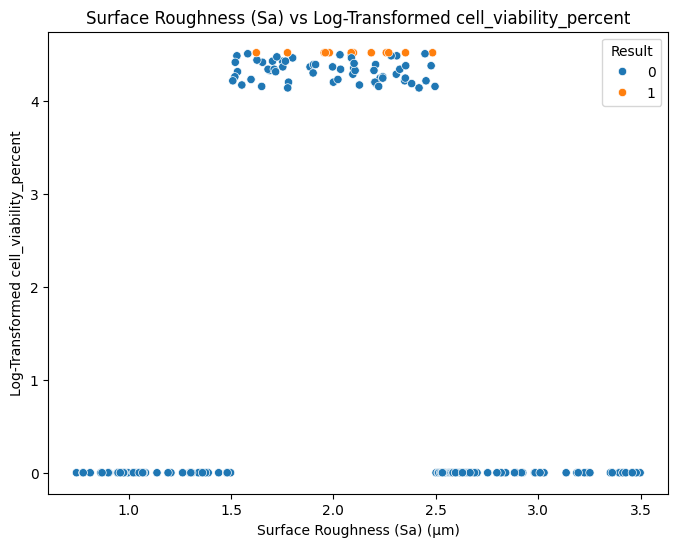

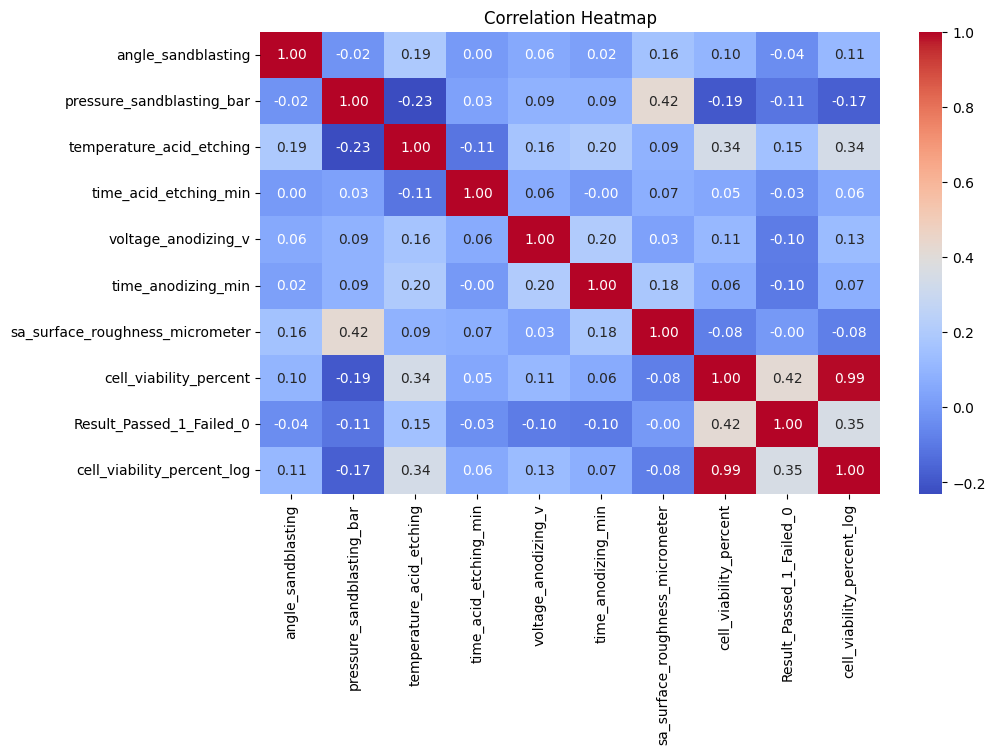

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, normaltest
from feature_engine.outliers import Winsorizer

# Hardcoded parameters for experimentation
sa_lower_bound = 1.5
sa_upper_bound = 2.5
cell_viability_threshold = 90
outlier_capping_method = 'quantiles'
outlier_tail = 'both'
outlier_fold = 0.05
log_transform_variable = 'cell_viability_percent'

# Columns to convert for numeric processing
cols_to_convert = [
    'pressure_sandblasting_bar',
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v',
    'time_anodizing_min',
    'sa_surface_roughness_micrometer',
    'cell_viability_percent'
]

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Data shape
print(f"\nData shape: {data.shape}")

# Data types and basic info
print("\nData info:")
data.info()

# Display data types of each column
print("\nData types:")
print(data.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include='all'))

# Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())

# Handling non-numeric values
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these columns
data = data.dropna(subset=cols_to_convert)

# Confirm that non-numeric values are handled
print("\nData types after cleaning:")
print(data.dtypes)

# Filter data according to the given validation ranges
valid_data = data[(data['sa_surface_roughness_micrometer'] > sa_lower_bound) & 
                  (data['sa_surface_roughness_micrometer'] < sa_upper_bound)]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data.loc[~data.index.isin(valid_data.index), 'cell_viability_percent'] = 0

# Set Result (1=Passed, 0=Failed) based on Cell Viability threshold
data['Result_Passed_1_Failed_0'] = np.where(data['cell_viability_percent'] > cell_viability_threshold, 1, 0)

# Outlier handling using Winsorizing
winsorizer = Winsorizer(
    capping_method=outlier_capping_method,
    tail=outlier_tail,
    fold=outlier_fold,
    variables=[log_transform_variable]
)
data[log_transform_variable] = winsorizer.fit_transform(data[[log_transform_variable]])

# Confirm Winsorizing effect
print("\nData after Winsorizing 'cell_viability_percent':")
print(data[log_transform_variable].describe())

# Apply Log Transformation to the specified variable
data[f'{log_transform_variable}_log'] = np.log1p(data[log_transform_variable])

# Check Normality and Skewness after Log Transformation
log_skewness = skew(data[f'{log_transform_variable}_log'])
print(f"Skewness of Log-Transformed {log_transform_variable}: {log_skewness:.2f}")

stat, p = normaltest(data[f'{log_transform_variable}_log'])
print(f"Normality test p-value for Log-Transformed {log_transform_variable}: {p:.3f}")

# Exploratory Data Analysis (EDA)

# 1. Bar Chart: Counts of Result
plt.figure(figsize=(8, 6))
sns.countplot(x='Result_Passed_1_Failed_0', data=data)
plt.title("Counts of Result (1=Passed, 0=Failed)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# 2. Pie Chart: Distribution of Results
result_counts = data['Result_Passed_1_Failed_0'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Results (1=Passed, 0=Failed)")
plt.axis('equal')
plt.show()

# 3. Box Plot: Distribution of Surface Roughness (Sa) and Log-Transformed Variable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='sa_surface_roughness_micrometer', data=data)
plt.title("Distribution of Surface Roughness (Sa)")
plt.ylabel("Surface Roughness (Sa) (µm)")

plt.subplot(1, 2, 2)
sns.boxplot(y=f'{log_transform_variable}_log', data=data)
plt.title(f"Distribution of Log-Transformed {log_transform_variable}")
plt.ylabel(f"Log-Transformed {log_transform_variable}")

plt.tight_layout()
plt.show()

# 4. Scatter Plot: Surface Roughness (Sa) vs Log-Transformed Variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sa_surface_roughness_micrometer', 
                y=f'{log_transform_variable}_log', hue='Result_Passed_1_Failed_0', data=data)
plt.title(f"Surface Roughness (Sa) vs Log-Transformed {log_transform_variable}")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel(f"Log-Transformed {log_transform_variable}")
plt.legend(title='Result')
plt.show()

# 5. Correlation Heatmap: Focus on Sa and Cell Viability
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### 3. Data Preprocessing


Missing values:
 angle_sandblasting                 0
pressure_sandblasting_bar          0
temperature_acid_etching           0
time_acid_etching_min              0
voltage_anodizing_v                0
time_anodizing_min                 0
sa_surface_roughness_micrometer    0
cell_viability_percent             0
Result_Passed_1_Failed_0           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   angle_sandblasting               198 non-null    float64
 1   pressure_sandblasting_bar        198 non-null    float64
 2   temperature_acid_etching         198 non-null    float64
 3   time_acid_etching_min            198 non-null    float64
 4   voltage_anodizing_v              198 non-null    float64
 5   time_anodizing_min               198 non-null    float64
 6   sa_surface_roughness_micrometer 

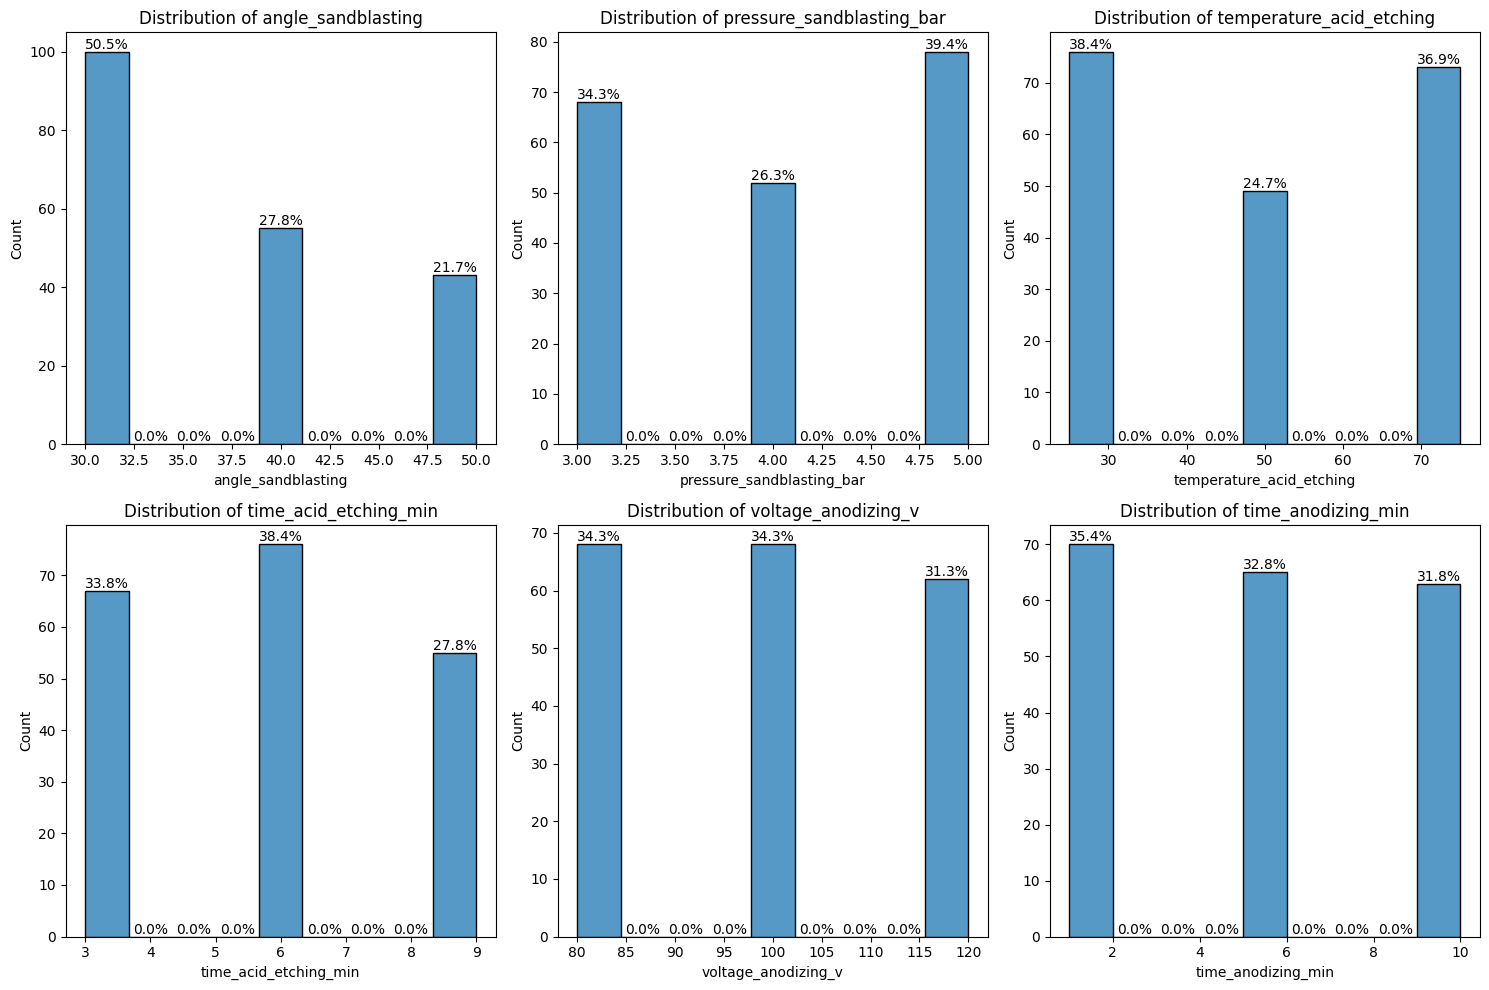

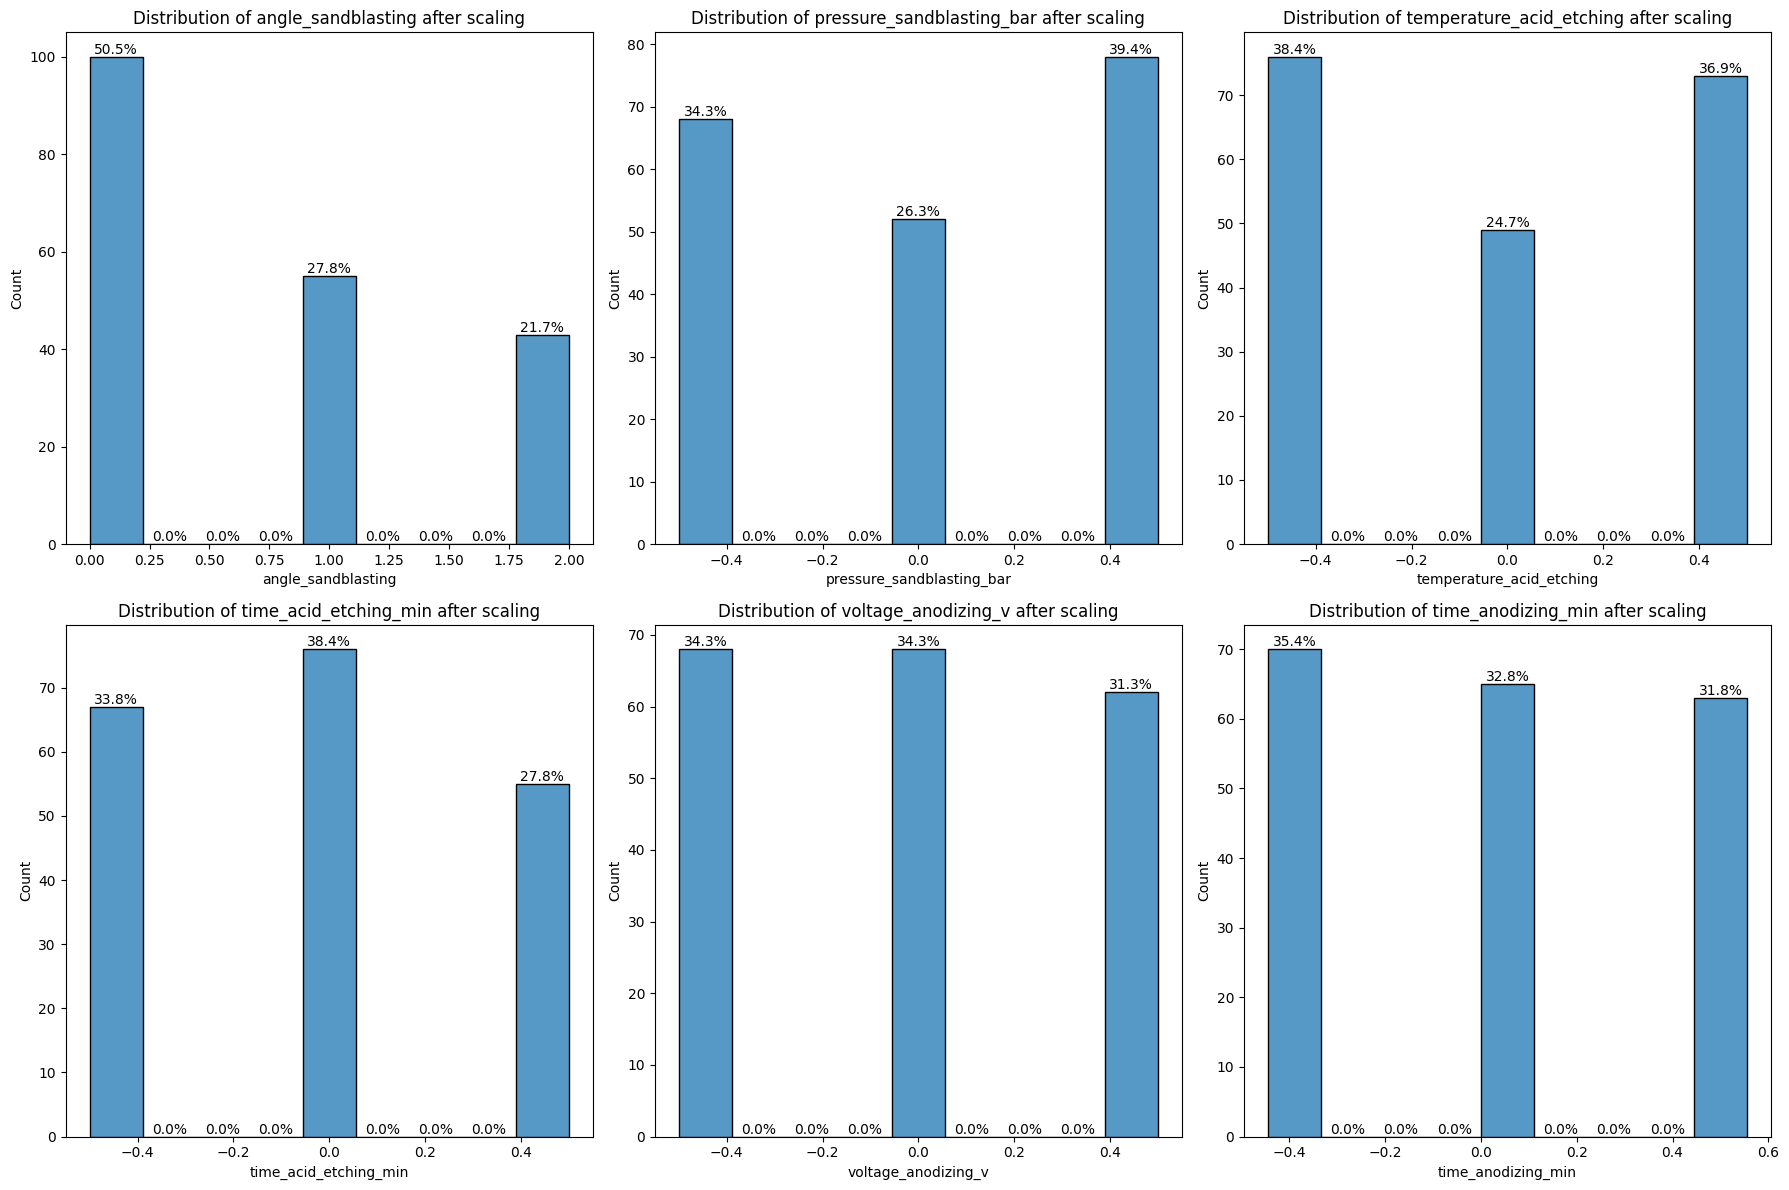

Training set size for Surface Roughness (Sa): (158, 6)
Testing set size for Surface Roughness (Sa): (40, 6)
Training set size for Cell Viability (CV): (158,)
Testing set size for Cell Viability (CV): (40,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hardcoded parameters for experimentation
knn_n_neighbors = 5
sa_lower_bound = 1.5
sa_upper_bound = 2.5
test_size = 0.2
random_state = 42

# Columns to convert for numeric processing (from config.yaml)
cols_to_convert = [
    'pressure_sandblasting_bar',
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v',
    'time_anodizing_min',
    'sa_surface_roughness_micrometer',
    'cell_viability_percent'
]

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Convert appropriate columns to numeric, forcing errors to NaN
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Advanced Imputation using KNN Imputer
imputer = KNNImputer(n_neighbors=knn_n_neighbors)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify data after imputation
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Filter data according to the given validation ranges for Surface Roughness (Sa)
valid_data = data_imputed[
    (data_imputed['sa_surface_roughness_micrometer'] > sa_lower_bound) & 
    (data_imputed['sa_surface_roughness_micrometer'] < sa_upper_bound)
]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data_imputed.loc[~data_imputed.index.isin(valid_data.index), 'cell_viability_percent'] = 0

# Feature columns and target columns (from config.yaml)
feature_columns = [
    'angle_sandblasting',
    'pressure_sandblasting_bar',
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v',
    'time_anodizing_min'
]
target_column_sa = 'sa_surface_roughness_micrometer'
target_column_cv = 'cell_viability_percent'

# Separate features and target variables
X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Visualize distributions before scaling
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    ax = sns.histplot(X[column], kde=False, edgecolor='black')
    
    # Add percentage labels
    total = len(X[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Normalize or standardize features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Visualize distributions after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

num_features = len(feature_columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten axes array to easily iterate over it

for i, column in enumerate(X_scaled_df.columns):
    ax = sns.histplot(X_scaled_df[column], kde=False, ax=axes[i], edgecolor='black')
    
    # Add percentage labels
    total = len(X_scaled_df[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

    axes[i].set_title(f'Distribution of {column} after scaling')

plt.tight_layout()
plt.show()

# Split the data into training and testing sets for both Surface Roughness (Sa) and Cell Viability (CV)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_imputed[[target_column_sa, target_column_cv]], test_size=test_size, random_state=random_state)

# Separate targets for training and testing sets
y_sa_train = y_train[target_column_sa]
y_sa_test = y_test[target_column_sa]
y_cv_train = y_train[target_column_cv]
y_cv_test = y_test[target_column_cv]

print("Training set size for Surface Roughness (Sa):", X_train.shape)
print("Testing set size for Surface Roughness (Sa):", X_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 4. Feature Engineering


Number of components after PCA: 6
Number of features selected for Sa after RFE: 6
Number of features selected for CV after RFE: 6


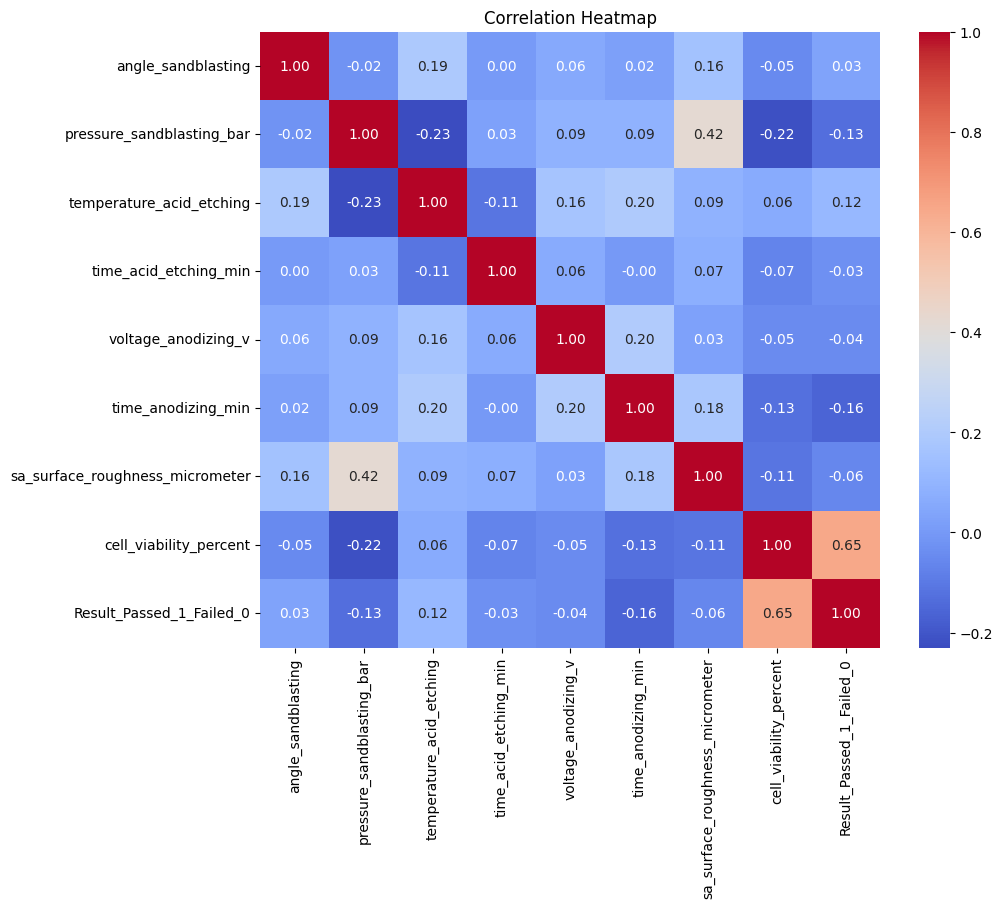

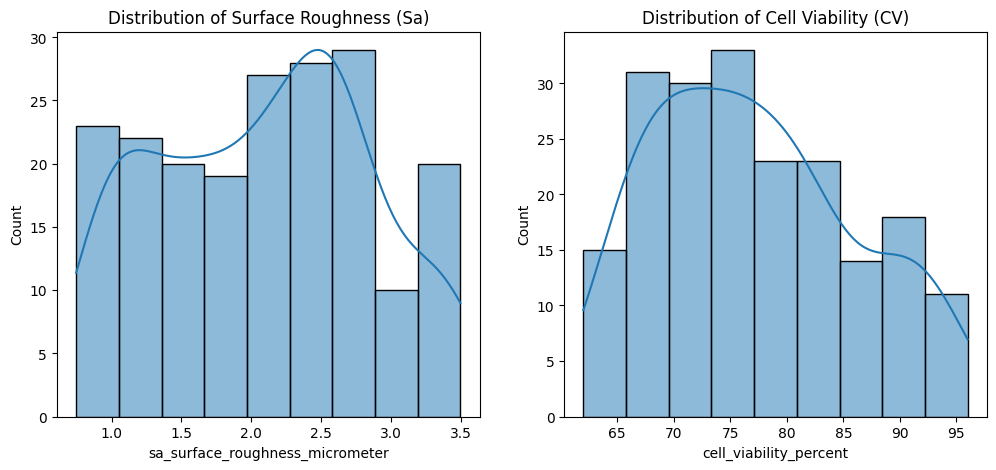

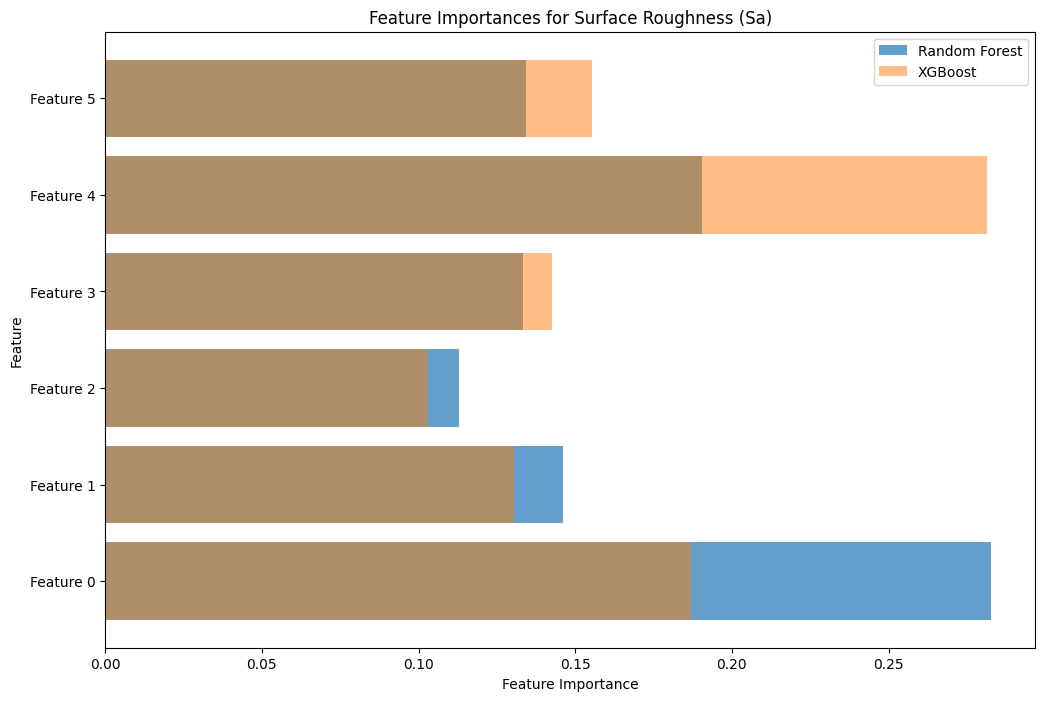

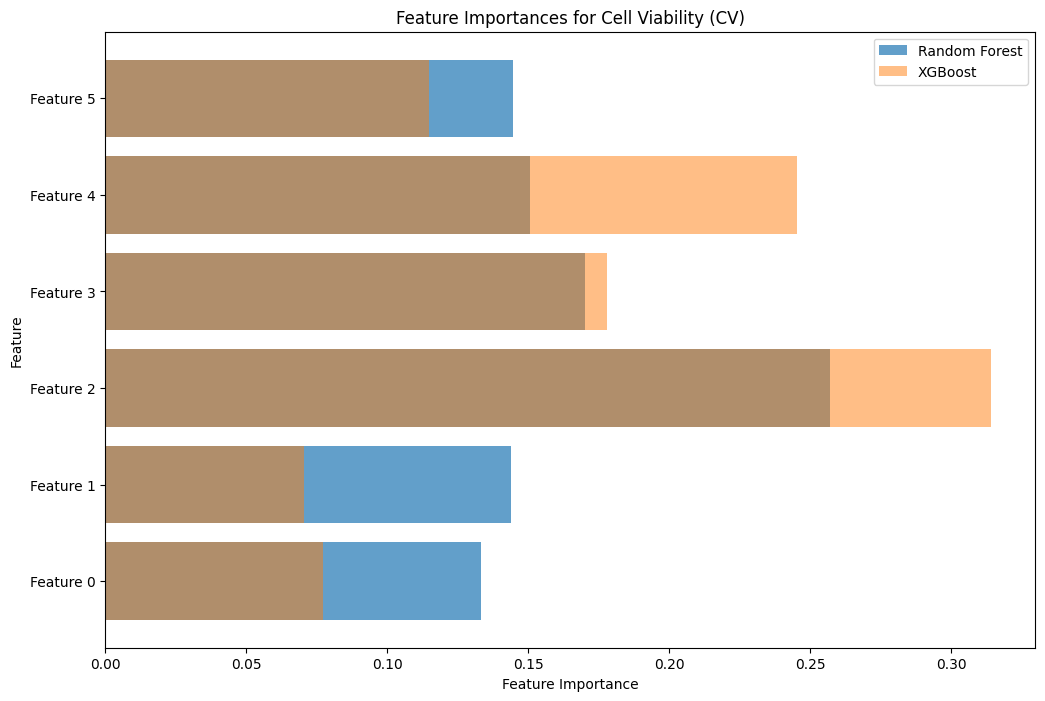

Training set size after feature selection for Sa: (158, 6)
Testing set size after feature selection for Sa: (40, 6)
Training set size after feature selection for CV: (158, 6)
Testing set size after feature selection for CV: (40, 6)


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor

# Hardcoded parameters for experimentation
polynomial_features_degree = 2
scaling_method = 'robust'
lasso_max_iter = 10000
knn_n_neighbors = 5
test_size = 0.2
random_state = 42

# Columns to convert for numeric processing
cols_to_convert = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v', 
    'time_anodizing_min', 
    'sa_surface_roughness_micrometer', 
    'cell_viability_percent'
]

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Convert appropriate columns to numeric, forcing errors to NaN
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Use KNN Imputer to handle missing values
imputer = KNNImputer(n_neighbors=knn_n_neighbors)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define feature and target columns
feature_columns = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching', 
    'time_acid_etching_min', 
    'voltage_anodizing_v', 
    'time_anodizing_min'
]
target_column_sa = 'sa_surface_roughness_micrometer'
target_column_cv = 'cell_viability_percent'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=polynomial_features_degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_poly)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components after PCA: {X_pca.shape[1]}")

# Use RFE with Lasso as a model to select top features
lasso_model = Lasso(alpha=0.01, max_iter=lasso_max_iter)

# RFE for Sa
rfe_sa = RFE(lasso_model, n_features_to_select=10)
X_sa_rfe = rfe_sa.fit_transform(X_pca, y_sa)

# RFE for CV
rfe_cv = RFE(lasso_model, n_features_to_select=10)
X_cv_rfe = rfe_cv.fit_transform(X_pca, y_cv)

print(f"Number of features selected for Sa after RFE: {X_sa_rfe.shape[1]}")
print(f"Number of features selected for CV after RFE: {X_cv_rfe.shape[1]}")

# Split the data into training and testing sets (use consistent data splitting)
X_train_sa, X_test_sa, y_sa_train, y_sa_test = train_test_split(X_sa_rfe, y_sa, test_size=test_size, random_state=random_state)
X_train_cv, X_test_cv, y_cv_train, y_cv_test = train_test_split(X_cv_rfe, y_cv, test_size=test_size, random_state=random_state)

# Check for any inconsistencies in the data split
if X_train_sa.shape[0] != y_sa_train.shape[0] or X_train_cv.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test_sa.shape[0] != y_sa_test.shape[0] or X_test_cv.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")

# Correlation Heatmap for the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Target Variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_sa, kde=True)
plt.title('Distribution of Surface Roughness (Sa)')
plt.subplot(1, 2, 2)
sns.histplot(y_cv, kde=True)
plt.title('Distribution of Cell Viability (CV)')
plt.show()

# Plotting Feature Importances for Sa and CV using RandomForest and XGBoost after PCA and RFE

# Random Forest for Sa
rf_sa = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf_sa.fit(X_train_sa, y_sa_train)
importances_rf_sa = rf_sa.feature_importances_

# Random Forest for CV
rf_cv = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf_cv.fit(X_train_cv, y_cv_train)
importances_rf_cv = rf_cv.feature_importances_

# XGBoost for Sa
xgb_sa = XGBRegressor(n_estimators=100, random_state=random_state)
xgb_sa.fit(X_train_sa, y_sa_train)
importances_xgb_sa = xgb_sa.feature_importances_

# XGBoost for CV
xgb_cv = XGBRegressor(n_estimators=100, random_state=random_state)
xgb_cv.fit(X_train_cv, y_cv_train)
importances_xgb_cv = xgb_cv.feature_importances_

# Plotting Feature Importances for Sa
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(importances_rf_sa))], importances_rf_sa, label='Random Forest', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(importances_xgb_sa))], importances_xgb_sa, label='XGBoost', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Surface Roughness (Sa)')
plt.legend()
plt.show()

# Plotting Feature Importances for CV
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(importances_rf_cv))], importances_rf_cv, label='Random Forest', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(importances_xgb_cv))], importances_xgb_cv, label='XGBoost', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Cell Viability (CV)')
plt.legend()
plt.show()

print(f"Training set size after feature selection for Sa: {X_train_sa.shape}")
print(f"Testing set size after feature selection for Sa: {X_test_sa.shape}")
print(f"Training set size after feature selection for CV: {X_train_cv.shape}")
print(f"Testing set size after feature selection for CV: {X_test_cv.shape}")


### 5. Model Training


In [7]:
# (For next stage research/04_model_trainer.ipynb as a config.yaml)
# Assume X_train_sa_rfe, y_sa_train, X_test_sa_rfe, y_sa_test, X_train_cv_rfe, y_cv_train, X_test_cv_rfe, y_cv_test are provided as input to this stage

# # Load the preprocessed training and test data
# train_sa_data = pd.read_csv('artifacts/data_transformation/train/train_sa_target.csv')
# test_sa_data = pd.read_csv('artifacts/data_transformation/test/test_sa_target.csv')
# train_cv_data = pd.read_csv('artifacts/data_transformation/train/train_cv_target.csv')
# test_cv_data = pd.read_csv('artifacts/data_transformation/test/test_cv_target.csv')

# # Extract feature columns for Surface Roughness (Sa)
# X_train_sa = train_sa_data.iloc[:, :-1]
# y_train_sa = train_sa_data.iloc[:, -1]
# X_test_sa = test_sa_data.iloc[:, :-1]
# y_test_sa = test_sa_data.iloc[:, -1]

# # Extract feature columns for Cell Viability (CV)
# X_train_cv = train_cv_data.iloc[:, :-1]
# y_train_cv = train_cv_data.iloc[:, -1]
# X_test_cv = test_cv_data.iloc[:, :-1]
# y_test_cv = test_cv_data.iloc[:, -1]


# This would be the output from the Feature Engineering (Step 4)

Training RandomForest...
RandomForest - MAE (Sa): 0.6371, MAE (CV): 7.1833
RandomForest - R² (Sa): -0.2761, R² (CV): 0.0659
RandomForest - MAPE (Sa): 51.3929, MAPE (CV): 9.2898
RandomForest - SMAPE (Sa): 36.1740, SMAPE (CV): 9.1894
Training BaggingRF...
BaggingRF - MAE (Sa): 0.6132, MAE (CV): 6.9258
BaggingRF - R² (Sa): -0.1698, R² (CV): 0.1081
BaggingRF - MAPE (Sa): 50.4848, MAPE (CV): 8.9209
BaggingRF - SMAPE (Sa): 35.2116, SMAPE (CV): 8.8794
Training Ridge...
Ridge - MAE (Sa): 0.6314, MAE (CV): 7.3566
Ridge - R² (Sa): -0.2610, R² (CV): 0.0309
Ridge - MAPE (Sa): 52.4635, MAPE (CV): 9.4943
Ridge - SMAPE (Sa): 35.8930, SMAPE (CV): 9.4550

Model Performance:
               MAE (Sa)  MSE (Sa)   R² (Sa)  MAPE (Sa)  SMAPE (Sa)  MAE (CV)  \
RandomForest  0.637061  0.649233 -0.276109  51.392944   36.174025  7.183309   
BaggingRF     0.613165  0.595126 -0.169757  50.484789   35.211554  6.925796   
Ridge         0.631394  0.641529 -0.260966  52.463540   35.893006  7.356586   

               M

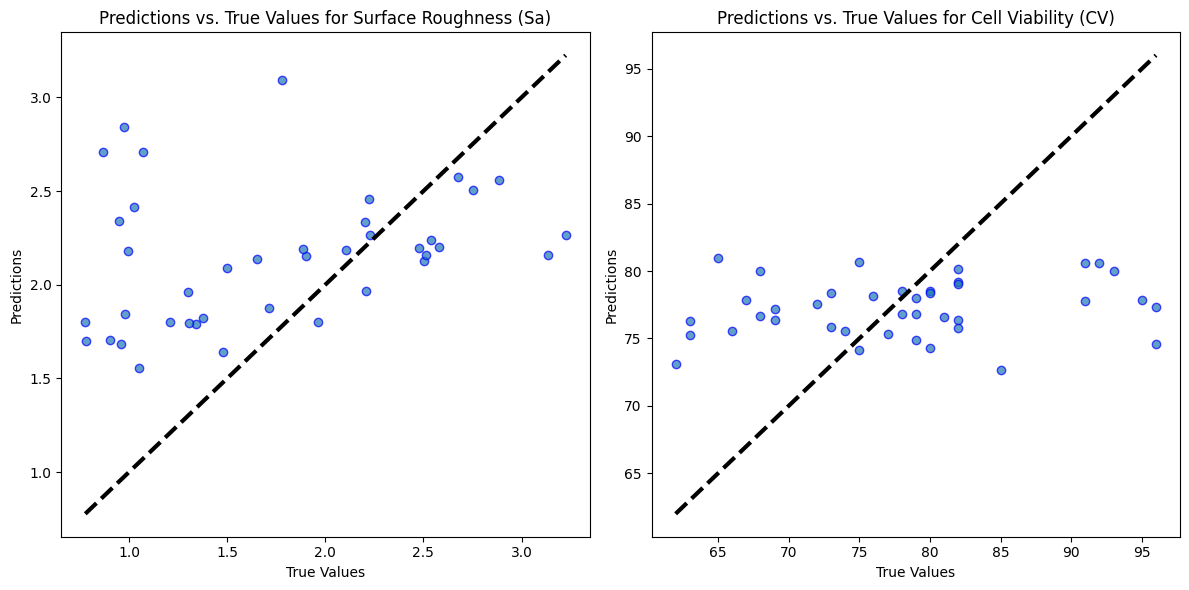

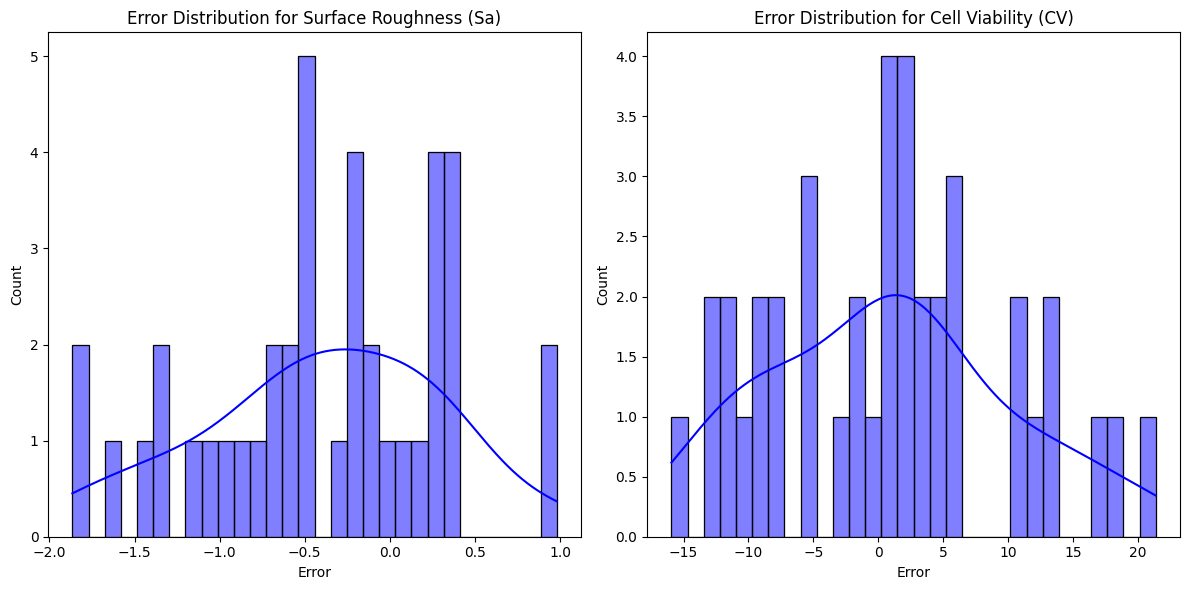

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hardcoded parameters for experimentation (these can be added to a 'params.yaml' file later)
random_state = 42  # Ensures reproducibility of results
test_size = 0.2    # Defines the proportion of the dataset to be used as test data

# Custom evaluation metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# (For next stage research/04_model_trainer.ipynb as a config.yaml)
# Assume X_train_sa_rfe, y_sa_train, X_test_sa_rfe, y_sa_test, X_train_cv_rfe, y_cv_train, X_test_cv_rfe, y_cv_test are provided as input to this stage

# # Load the preprocessed training and test data
# train_sa_data = pd.read_csv('artifacts/data_transformation/train/train_sa_target.csv')
# test_sa_data = pd.read_csv('artifacts/data_transformation/test/test_sa_target.csv')
# train_cv_data = pd.read_csv('artifacts/data_transformation/train/train_cv_target.csv')
# test_cv_data = pd.read_csv('artifacts/data_transformation/test/test_cv_target.csv')

# # Extract feature columns for Surface Roughness (Sa)
# X_train_sa = train_sa_data.iloc[:, :-1]
# y_train_sa = train_sa_data.iloc[:, -1]
# X_test_sa = test_sa_data.iloc[:, :-1]
# y_test_sa = test_sa_data.iloc[:, -1]

# # Extract feature columns for Cell Viability (CV)
# X_train_cv = train_cv_data.iloc[:, :-1]
# y_train_cv = train_cv_data.iloc[:, -1]
# X_test_cv = test_cv_data.iloc[:, :-1]
# y_test_cv = test_cv_data.iloc[:, -1]


# This would be the output from the Feature Engineering (Step 4)


# Models for training (Move model configurations to 'params.yaml' in future)
models = {
    "RandomForest": RandomForestRegressor(random_state=random_state),
    "BaggingRF": BaggingRegressor(estimator=RandomForestRegressor(random_state=random_state), random_state=random_state),
    "Ridge": Ridge()
}

# Initialize a dictionary to store model performance
model_performance = {}

# Train each model and evaluate for Surface Roughness (Sa) and Cell Viability (CV)
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train and predict for Surface Roughness (Sa)
    model.fit(X_train_sa, y_sa_train)  # Use the data from Feature Engineering (Step 4)
    y_sa_pred = model.predict(X_test_sa)
    mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
    mse_sa = mean_squared_error(y_sa_test, y_sa_pred)
    r2_sa = r2_score(y_sa_test, y_sa_pred)
    mape_sa = mape(y_sa_test, y_sa_pred)
    smape_sa = smape(y_sa_test, y_sa_pred)

    # Train and predict for Cell Viability (CV)
    model.fit(X_train_cv, y_cv_train)  # Use the data from Feature Engineering (Step 4)
    y_cv_pred = model.predict(X_test_cv)
    mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
    mse_cv = mean_squared_error(y_cv_test, y_cv_pred)
    r2_cv = r2_score(y_cv_test, y_cv_pred)
    mape_cv = mape(y_cv_test, y_cv_pred)
    smape_cv = smape(y_cv_test, y_cv_pred)

    # Store performance metrics
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MSE (Sa)": mse_sa,
        "R² (Sa)": r2_sa,
        "MAPE (Sa)": mape_sa,
        "SMAPE (Sa)": smape_sa,
        "MAE (CV)": mae_cv,
        "MSE (CV)": mse_cv,
        "R² (CV)": r2_cv,
        "MAPE (CV)": mape_cv,
        "SMAPE (CV)": smape_cv,
    }

    # Output performance metrics
    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")
    print(f"{model_name} - R² (Sa): {r2_sa:.4f}, R² (CV): {r2_cv:.4f}")
    print(f"{model_name} - MAPE (Sa): {mape_sa:.4f}, MAPE (CV): {mape_cv:.4f}")
    print(f"{model_name} - SMAPE (Sa): {smape_sa:.4f}, SMAPE (CV): {smape_cv:.4f}")

# Convert performance metrics to DataFrame for easier analysis
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Visualizations for model evaluation
# Predictions vs. True Values for Sa and CV
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred, alpha=0.7, edgecolors='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred, alpha=0.7, edgecolors='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 6.Hyperparameter Tuning : 


In [10]:
# (For next stage research/04_model_trainer.ipynb as a config.yaml)
# Assume X_train_sa_rfe, y_sa_train, X_test_sa_rfe, y_sa_test, X_train_cv_rfe, y_cv_train, X_test_cv_rfe, y_cv_test are provided as input to this stage

# # Load the preprocessed training and test data
# train_sa_data = pd.read_csv('artifacts/data_transformation/train/train_sa_target.csv')
# test_sa_data = pd.read_csv('artifacts/data_transformation/test/test_sa_target.csv')
# train_cv_data = pd.read_csv('artifacts/data_transformation/train/train_cv_target.csv')
# test_cv_data = pd.read_csv('artifacts/data_transformation/test/test_cv_target.csv')

# # Extract feature columns
#  X_train_sa = train_sa_data.iloc[:, :-1]
# y_train_sa = train_sa_data.iloc[:, -1]
# X_test_sa = test_sa_data.iloc[:, :-1]
# y_test_sa = test_sa_data.iloc[:, -1]

# X_train_cv = train_cv_data.iloc[:, :-1]
# y_train_cv = train_cv_data.iloc[:, -1]
# X_test_cv = test_cv_data.iloc[:, :-1]
# y_test_cv = test_cv_data.iloc[:, -1]

# This would be the output from the Model Training (Step 5)

Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters for RandomForest (Sa): {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters for BaggingRF (CV): {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.7, 'estimator__max_depth': None}
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters for Ridge (Sa): {'alpha': 100}
Tuned RandomForest (Sa) - MAE: 0.6489, R²: -0.2771, MAPE: 52.3582, SMAPE: 36.6913
Tuned BaggingRF (CV) - MAE: 6.9078, R²: 0.1008, MAPE: 8.9143, SMAPE: 8.8771
Tuned Ridge (Sa) - MAE: 0.6557, R²: -0.2394, MAPE: 53.8563, SMAPE: 37.4305


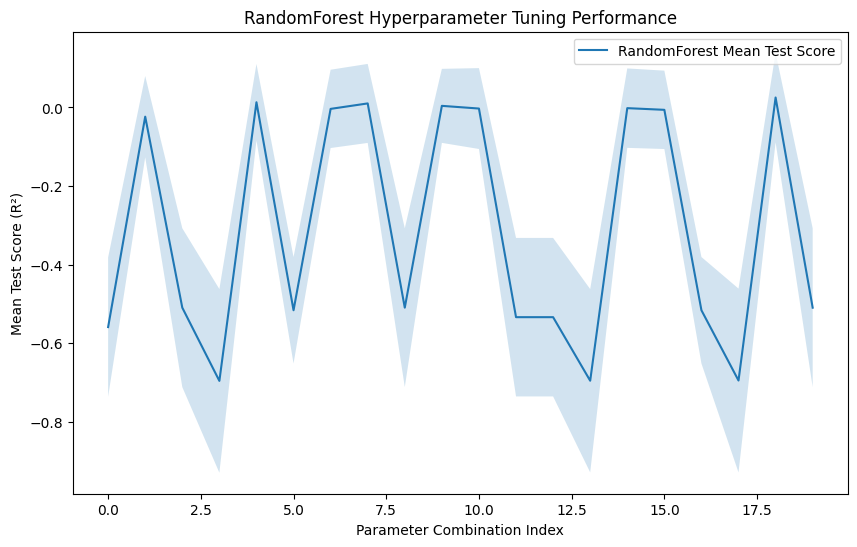

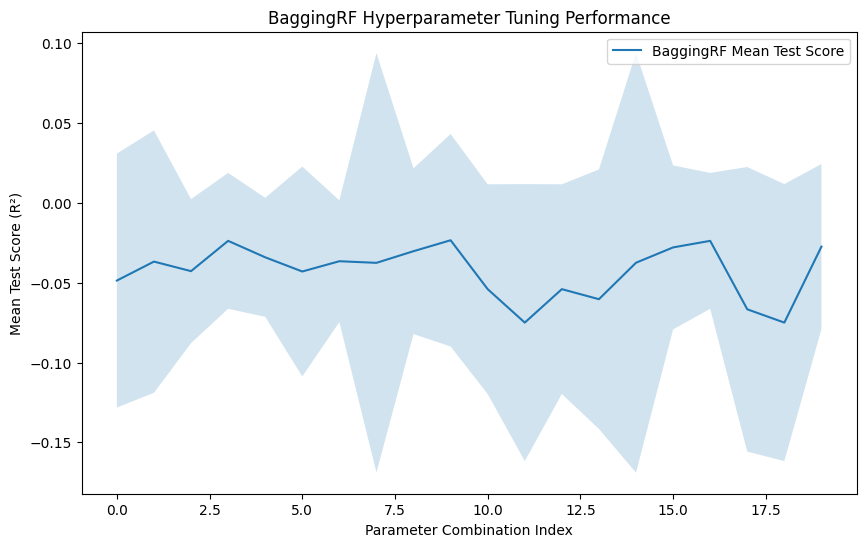

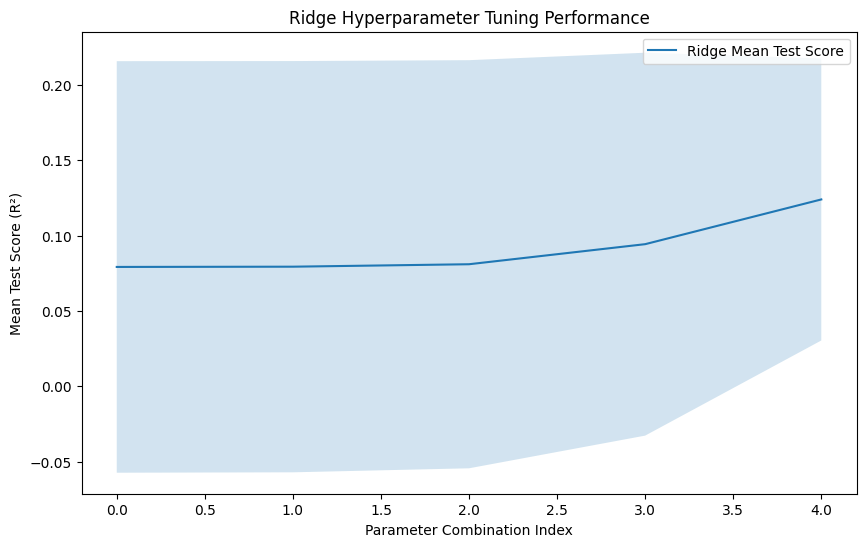

In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded parameters for experimentation (these could be moved to a params.yaml for future use)
random_state = 42
n_iter = 20
cv = 3
verbose = 2
n_jobs = -1

# Custom evaluation metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# (For next stage research/04_model_trainer.ipynb as a config.yaml)
# Assume X_train_sa_rfe, y_sa_train, X_test_sa_rfe, y_sa_test, X_train_cv_rfe, y_cv_train, X_test_cv_rfe, y_cv_test are provided as input to this stage

# # Load the preprocessed training and test data
# train_sa_data = pd.read_csv('artifacts/data_transformation/train/train_sa_target.csv')
# test_sa_data = pd.read_csv('artifacts/data_transformation/test/test_sa_target.csv')
# train_cv_data = pd.read_csv('artifacts/data_transformation/train/train_cv_target.csv')
# test_cv_data = pd.read_csv('artifacts/data_transformation/test/test_cv_target.csv')

# # Extract feature columns
#  X_train_sa = train_sa_data.iloc[:, :-1]
# y_train_sa = train_sa_data.iloc[:, -1]
# X_test_sa = test_sa_data.iloc[:, :-1]
# y_test_sa = test_sa_data.iloc[:, -1]

# X_train_cv = train_cv_data.iloc[:, :-1]
# y_train_cv = train_cv_data.iloc[:, -1]
# X_test_cv = test_cv_data.iloc[:, :-1]
# y_test_cv = test_cv_data.iloc[:, -1]

# This would be the output from the Model Training (Step 5)

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__max_depth': [None, 10, 20, 30]  # Adjusted to match nested estimator params
}

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Hyperparameter tuning for RandomForest (Sa)
rf_random_search_sa = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=random_state),
    param_distributions=param_grid_rf,
    n_iter=n_iter,
    cv=cv,
    verbose=verbose,
    random_state=random_state,
    n_jobs=n_jobs
)

# Hyperparameter tuning for BaggingRF (CV)
bagging_random_search_cv = RandomizedSearchCV(
    estimator=BaggingRegressor(estimator=RandomForestRegressor(random_state=random_state), random_state=random_state),
    param_distributions=param_grid_bagging,
    n_iter=n_iter,
    cv=cv,
    verbose=verbose,
    random_state=random_state,
    n_jobs=n_jobs
)

# Hyperparameter tuning for Ridge (Sa)
ridge_random_search_sa = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=param_grid_ridge,
    n_iter=len(param_grid_ridge['alpha']),  # Number of iterations equals the number of parameters
    cv=cv,
    verbose=verbose,
    random_state=random_state,
    n_jobs=n_jobs
)

# Fit the hyperparameter tuning for each model
print("Starting hyperparameter tuning...")

# RandomForest (Sa)
rf_random_search_sa.fit(X_train_sa, y_sa_train)
best_rf_model_sa = rf_random_search_sa.best_estimator_
print("Best hyperparameters for RandomForest (Sa):", rf_random_search_sa.best_params_)

# BaggingRF (CV)
bagging_random_search_cv.fit(X_train_cv, y_cv_train)
best_bagging_model_cv = bagging_random_search_cv.best_estimator_
print("Best hyperparameters for BaggingRF (CV):", bagging_random_search_cv.best_params_)

# Ridge (Sa)
ridge_random_search_sa.fit(X_train_sa, y_sa_train)
best_ridge_model_sa = ridge_random_search_sa.best_estimator_
print("Best hyperparameters for Ridge (Sa):", ridge_random_search_sa.best_params_)

# Evaluate the tuned models on the test set

# Surface Roughness (Sa) - RandomForest
y_sa_pred_tuned_rf = best_rf_model_sa.predict(X_test_sa)
mae_sa_tuned_rf = mean_absolute_error(y_sa_test, y_sa_pred_tuned_rf)
mse_sa_tuned_rf = mean_squared_error(y_sa_test, y_sa_pred_tuned_rf)
r2_sa_tuned_rf = r2_score(y_sa_test, y_sa_pred_tuned_rf)
mape_sa_tuned_rf = mape(y_sa_test, y_sa_pred_tuned_rf)
smape_sa_tuned_rf = smape(y_sa_test, y_sa_pred_tuned_rf)

print(f"Tuned RandomForest (Sa) - MAE: {mae_sa_tuned_rf:.4f}, R²: {r2_sa_tuned_rf:.4f}, MAPE: {mape_sa_tuned_rf:.4f}, SMAPE: {smape_sa_tuned_rf:.4f}")

# Cell Viability (CV) - BaggingRF
y_cv_pred_tuned_bagging = best_bagging_model_cv.predict(X_test_cv)
mae_cv_tuned_bagging = mean_absolute_error(y_cv_test, y_cv_pred_tuned_bagging)
mse_cv_tuned_bagging = mean_squared_error(y_cv_test, y_cv_pred_tuned_bagging)
r2_cv_tuned_bagging = r2_score(y_cv_test, y_cv_pred_tuned_bagging)
mape_cv_tuned_bagging = mape(y_cv_test, y_cv_pred_tuned_bagging)
smape_cv_tuned_bagging = smape(y_cv_test, y_cv_pred_tuned_bagging)

print(f"Tuned BaggingRF (CV) - MAE: {mae_cv_tuned_bagging:.4f}, R²: {r2_cv_tuned_bagging:.4f}, MAPE: {mape_cv_tuned_bagging:.4f}, SMAPE: {smape_cv_tuned_bagging:.4f}")

# Surface Roughness (Sa) - Ridge
y_sa_pred_tuned_ridge = best_ridge_model_sa.predict(X_test_sa)
mae_sa_tuned_ridge = mean_absolute_error(y_sa_test, y_sa_pred_tuned_ridge)
mse_sa_tuned_ridge = mean_squared_error(y_sa_test, y_sa_pred_tuned_ridge)
r2_sa_tuned_ridge = r2_score(y_sa_test, y_sa_pred_tuned_ridge)
mape_sa_tuned_ridge = mape(y_sa_test, y_sa_pred_tuned_ridge)
smape_sa_tuned_ridge = smape(y_sa_test, y_sa_pred_tuned_ridge)

print(f"Tuned Ridge (Sa) - MAE: {mae_sa_tuned_ridge:.4f}, R²: {r2_sa_tuned_ridge:.4f}, MAPE: {mape_sa_tuned_ridge:.4f}, SMAPE: {smape_sa_tuned_ridge:.4f}")

# Visualizations for Hyperparameter Tuning Results

# RandomForest Hyperparameter Tuning Results
rf_results = rf_random_search_sa.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(rf_results['mean_test_score'], label='RandomForest Mean Test Score')
plt.fill_between(
    range(len(rf_results['mean_test_score'])),
    rf_results['mean_test_score'] - rf_results['std_test_score'],
    rf_results['mean_test_score'] + rf_results['std_test_score'],
    alpha=0.2
)
plt.title('RandomForest Hyperparameter Tuning Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R²)')
plt.legend()
plt.show()

# BaggingRF Hyperparameter Tuning Results
bagging_results = bagging_random_search_cv.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(bagging_results['mean_test_score'], label='BaggingRF Mean Test Score')
plt.fill_between(
    range(len(bagging_results['mean_test_score'])),
    bagging_results['mean_test_score'] - bagging_results['std_test_score'],
    bagging_results['mean_test_score'] + bagging_results['std_test_score'],
    alpha=0.2
)
plt.title('BaggingRF Hyperparameter Tuning Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R²)')
plt.legend()
plt.show()

# Ridge Hyperparameter Tuning Results
ridge_results = ridge_random_search_sa.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(ridge_results['mean_test_score'], label='Ridge Mean Test Score')
plt.fill_between(
    range(len(ridge_results['mean_test_score'])),
    ridge_results['mean_test_score'] - ridge_results['std_test_score'],
    ridge_results['mean_test_score'] + ridge_results['std_test_score'],
    alpha=0.2
)
plt.title('Ridge Hyperparameter Tuning Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R²)')
plt.legend()
plt.show()

# Save the best models if required
# joblib.dump(best_rf_model_sa, 'best_rf_model_sa.joblib')
# joblib.dump(best_bagging_model_cv, 'best_bagging_model_cv.joblib')
# joblib.dump(best_ridge_model_sa, 'best_ridge_model_sa.joblib')


### 7. Model Evaluation :


Evaluating Surface Roughness (Sa) models...

Evaluation metrics for RandomForest (Sa):
MAE: 0.6489
MSE: 0.6497
R²: -0.2771
MAPE: 52.3582%
SMAPE: 36.6913%

Evaluation metrics for Ridge (Sa):
MAE: 0.6557
MSE: 0.6306
R²: -0.2394
MAPE: 53.8563%
SMAPE: 37.4305%

Evaluating Cell Viability (CV) model...

Evaluation metrics for BaggingRF (CV):
MAE: 6.9078
MSE: 78.1350
R²: 0.1008
MAPE: 8.9143%
SMAPE: 8.8771%

Model Evaluation Summary:
               Model       MAE        MSE        R²       MAPE      SMAPE
0  RandomForest (Sa)  0.648900   0.649716 -0.277058  52.358245  36.691264
1         Ridge (Sa)  0.655687   0.630552 -0.239389  53.856292  37.430465
2     BaggingRF (CV)  6.907761  78.134953  0.100838   8.914279   8.877051


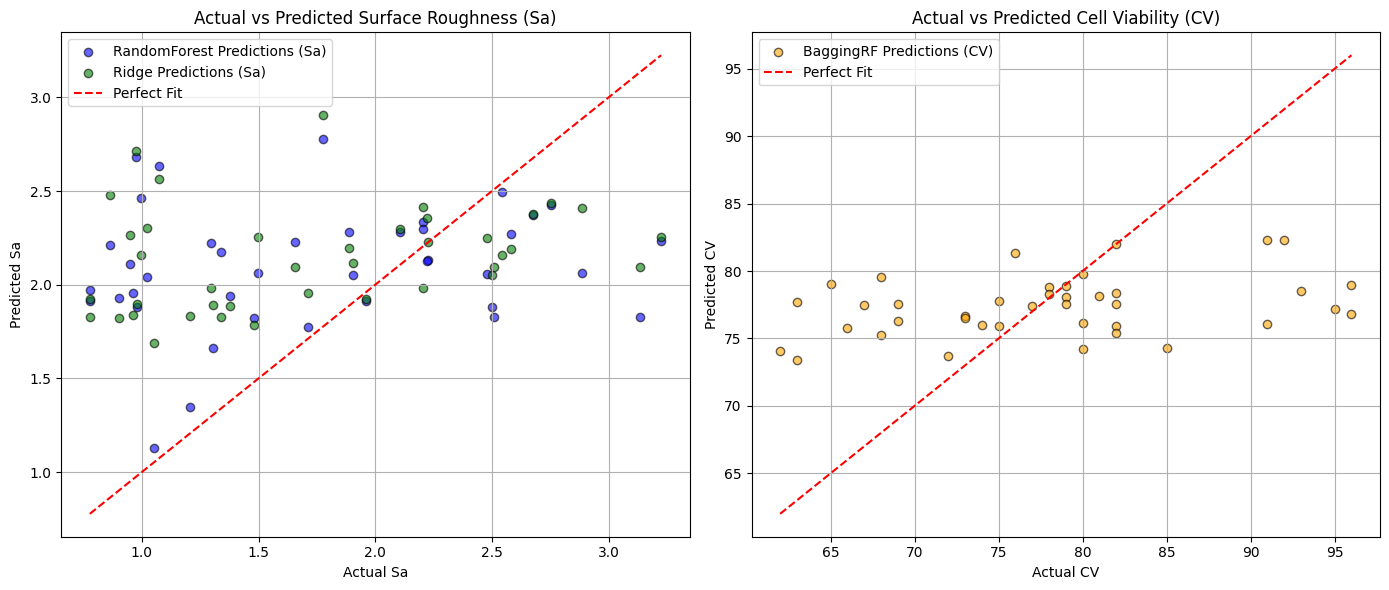

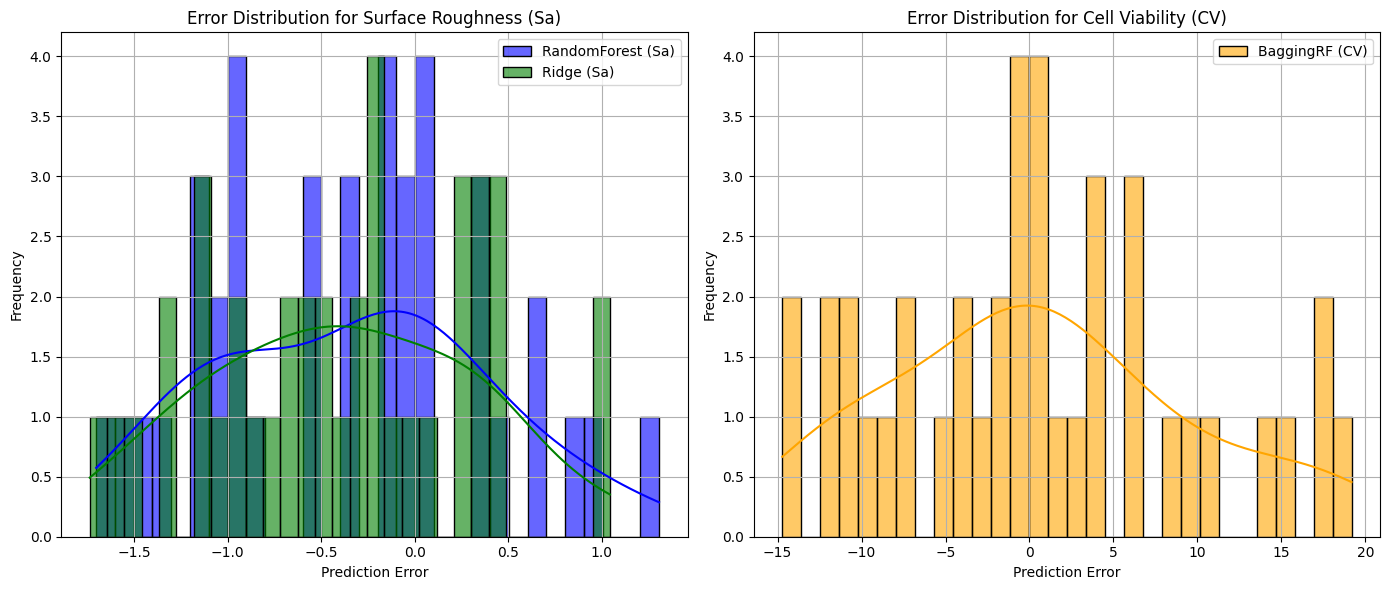

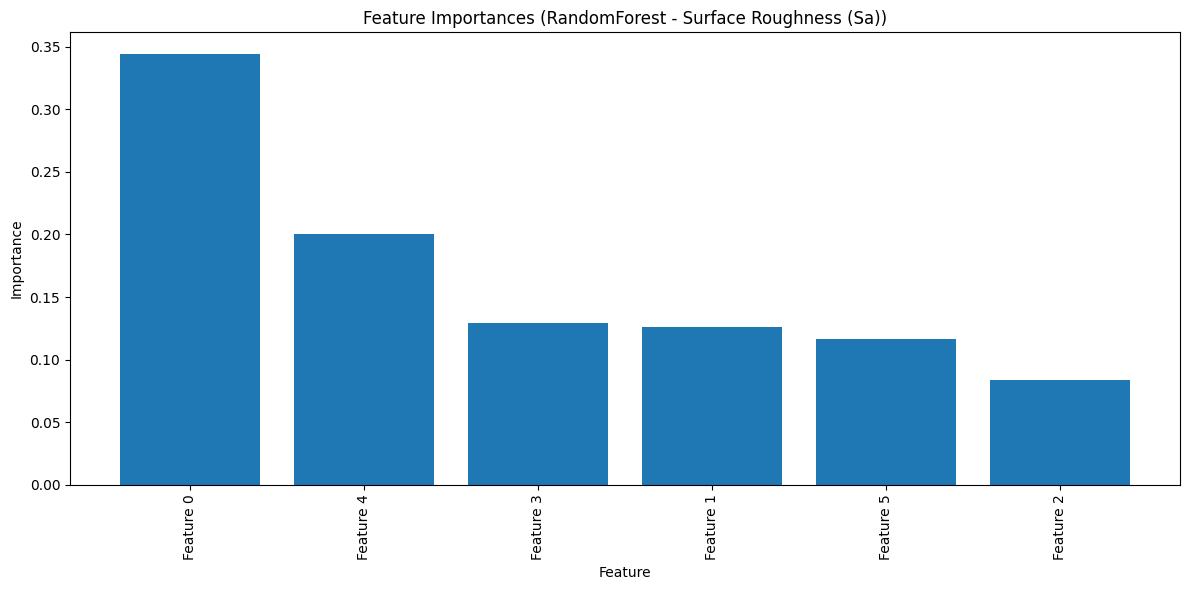

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading saved models if needed

# Hardcoded parameters for experimentation (use from Step 6 hyperparameter tuning results)
n_estimators_rf = 400
max_depth_rf = 30
min_samples_split_rf = 5
min_samples_leaf_rf = 4
bootstrap_rf = True
alpha_ridge = 100
n_estimators_bagging = 100
max_samples_bagging = 0.5
max_features_bagging = 0.7
random_state = 42

# Assuming X_train_sa, X_test_sa, y_sa_train, y_sa_test, X_train_cv, X_test_cv, y_cv_train, y_cv_test 
# have been defined in previous steps (Feature Engineering and Model Training)

# Load the best-tuned models from Hyperparameter Tuning (Step 6)
best_rf_model_sa = RandomForestRegressor(
    n_estimators=n_estimators_rf,
    max_depth=max_depth_rf,
    min_samples_split=min_samples_split_rf,
    min_samples_leaf=min_samples_leaf_rf,
    bootstrap=bootstrap_rf,
    random_state=random_state
)

best_bagging_model_cv = BaggingRegressor(
    estimator=RandomForestRegressor(max_depth=None, random_state=random_state),  # Changed from base_estimator to estimator
    n_estimators=n_estimators_bagging,
    max_samples=max_samples_bagging,
    max_features=max_features_bagging,
    random_state=random_state
)

best_ridge_model_sa = Ridge(alpha=alpha_ridge)

# Make predictions on the test set (use correct variable names from Feature Engineering)
y_sa_pred_rf = best_rf_model_sa.fit(X_train_sa, y_sa_train).predict(X_test_sa)
y_cv_pred_bagging = best_bagging_model_cv.fit(X_train_cv, y_cv_train).predict(X_test_cv)
y_sa_pred_ridge = best_ridge_model_sa.fit(X_train_sa, y_sa_train).predict(X_test_sa)

# Function to evaluate model performance using various metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))
    
    print(f"\nEvaluation metrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"SMAPE: {smape:.4f}%")
    
    return mae, mse, r2, mape, smape

# Evaluate RandomForest and Ridge for Surface Roughness (Sa)
print("Evaluating Surface Roughness (Sa) models...")
mae_rf_sa, mse_rf_sa, r2_rf_sa, mape_rf_sa, smape_rf_sa = evaluate_model(y_sa_test, y_sa_pred_rf, "RandomForest (Sa)")
mae_ridge_sa, mse_ridge_sa, r2_ridge_sa, mape_ridge_sa, smape_ridge_sa = evaluate_model(y_sa_test, y_sa_pred_ridge, "Ridge (Sa)")

# Evaluate BaggingRF for Cell Viability (CV)
print("\nEvaluating Cell Viability (CV) model...")
mae_bagging_cv, mse_bagging_cv, r2_bagging_cv, mape_bagging_cv, smape_bagging_cv = evaluate_model(y_cv_test, y_cv_pred_bagging, "BaggingRF (CV)")

# Summarize the model performance into a DataFrame for easier comparison
evaluation_summary = pd.DataFrame({
    "Model": ["RandomForest (Sa)", "Ridge (Sa)", "BaggingRF (CV)"],
    "MAE": [mae_rf_sa, mae_ridge_sa, mae_bagging_cv],
    "MSE": [mse_rf_sa, mse_ridge_sa, mse_bagging_cv],
    "R²": [r2_rf_sa, r2_ridge_sa, r2_bagging_cv],
    "MAPE": [mape_rf_sa, mape_ridge_sa, mape_bagging_cv],
    "SMAPE": [smape_rf_sa, smape_ridge_sa, smape_bagging_cv]
})

print("\nModel Evaluation Summary:")
print(evaluation_summary)

# Visualizations

# 1. Predicted vs Actual Values Plot for Surface Roughness (Sa)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred_rf, alpha=0.6, label="RandomForest Predictions (Sa)", color="blue", edgecolors="k")
plt.scatter(y_sa_test, y_sa_pred_ridge, alpha=0.6, label="Ridge Predictions (Sa)", color="green", edgecolors="k")
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.title("Actual vs Predicted Surface Roughness (Sa)")
plt.xlabel("Actual Sa")
plt.ylabel("Predicted Sa")
plt.legend()
plt.grid(True)

# 2. Predicted vs Actual Values Plot for Cell Viability (CV)
plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred_bagging, alpha=0.6, label="BaggingRF Predictions (CV)", color="orange", edgecolors="k")
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.title("Actual vs Predicted Cell Viability (CV)")
plt.xlabel("Actual CV")
plt.ylabel("Predicted CV")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Error Distribution Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred_rf, kde=True, color="blue", bins=30, label="RandomForest (Sa)", alpha=0.6)
sns.histplot(y_sa_test - y_sa_pred_ridge, kde=True, color="green", bins=30, label="Ridge (Sa)", alpha=0.6)
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred_bagging, kde=True, color="orange", bins=30, label="BaggingRF (CV)", alpha=0.6)
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Feature Importance Plot for the Best Model (RandomForest - Surface Roughness (Sa))
if hasattr(best_rf_model_sa, "feature_importances_"):
    plt.figure(figsize=(12, 6))
    feature_importances = best_rf_model_sa.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.bar(range(X_train_sa.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X_train_sa.shape[1]), [f"Feature {i}" for i in indices], rotation=90)
    plt.title("Feature Importances (RandomForest - Surface Roughness (Sa))")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
